## 1. Import the module

In [1]:
import altair as alt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

## 2. Summary of the data set

Attribute Information of the dataset:

| Column name                  | Description                                  | Type       | Values                              |
| ---------------------------- | ------------------------------------------- | ----------- |  ---------------------------------- |
| Wife age                     | Wife's age                                  | Numerical   | any positive values                 |
| Wife education               | Wife's education                            | Categorical | 1=low, 2, 3, 4=high                 |
| Husband education            | Husband's education                         | Categorical | 1=low, 2, 3, 4=high                 |
| Number of children ever born | Number of children ever born                | Numerical   | any positive values                 |
| Wife religion                | Wife's religion                             | Binary      | 0=Non-Islam, 1=Islam                |
| Wife now working?            | Is wife working or not                      | Binary      | 0=Yes, 1=No                         |
| Husband occupation           | Husband's occupation                        | Categorical | 1, 2, 3, 4                          |
| Standard-of-living index     | Standard-of-living Index                    | Categorical | 1=low, 2, 3, 4=high                 |
| Media Exposure               | Media exposure                              | Binary      | 0=Good, 1=Not good                  |
| Contraceptive method used    | Contraceptive method used (Class Attribute) | Categorical | 1=No-use, 2=Long-term, 3=Short-term |


### 2.1 Read the data and split the data into 70% train and 30% test set.

In [2]:
# Rename the column name
df = pd.read_csv(
    "../data/raw/contraceptive.csv",
    header=0,
    names=[
        "Wife age",
        "Wife education",
        "Husband education",
        "Number of children ever born",
        "Wife religion",
        "Wife now working?",
        "Husband occupation",
        "Standard-of-living index",
        "Media exposure",
        "Contraceptive method used",
    ],
)

# Split the data into 70:30
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df.head()

,Wife age,Wife education,Husband education,Number of children ever born,Wife religion,Wife now working?,Husband occupation,Standard-of-living index,Media exposure,Contraceptive method used
834,41,1,4,9,1,1,2,1,0,3
491,40,4,4,6,0,0,1,4,0,2
376,40,3,3,3,1,1,2,2,1,1
250,34,4,4,3,0,1,1,2,0,1
228,47,1,4,8,1,1,3,3,0,1


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 834 to 1389
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wife age                      1031 non-null   int64
 1   Wife education                1031 non-null   int64
 2   Husband education             1031 non-null   int64
 3   Number of children ever born  1031 non-null   int64
 4   Wife religion                 1031 non-null   int64
 5   Wife now working?             1031 non-null   int64
 6   Husband occupation            1031 non-null   int64
 7   Standard-of-living index      1031 non-null   int64
 8   Media exposure                1031 non-null   int64
 9   Contraceptive method used     1031 non-null   int64
dtypes: int64(10)
memory usage: 88.6 KB


In [4]:
train_df.describe()

,Wife age,Wife education,Husband education,Number of children ever born,Wife religion,Wife now working?,Husband occupation,Standard-of-living index,Media exposure,Contraceptive method used
count,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000
mean,32.730359,2.941804,3.441319,3.335597,0.859360,0.756547,2.115422,3.132881,0.078565,1.909796
std,8.349353,1.013744,0.804236,2.412323,0.347819,0.429374,0.872039,0.969834,0.269188,0.875010
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,5.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


## 2.2 Distribution of target values

In [5]:
train_df['Contraceptive method used'].value_counts()

1    445
3    352
2    234
Name: Contraceptive method used, dtype: int64

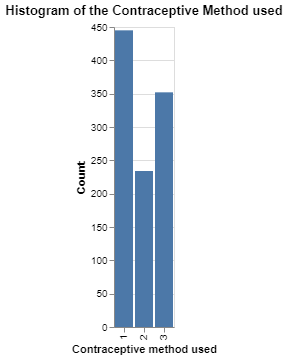

In [6]:
alt.Chart(train_df, title="Histogram of the Contraceptive Method used").mark_bar().encode(
    x=alt.X("Contraceptive method used", type="ordinal"),
    y=alt.Y("count()", title="Count"),
)

There is a class imbalance problem, but it is not necessary to immediately start our modeling plan with over- or under-sampling. We shall explore the data and create our model first.

## 3. Exploratory Data Analysis

### 3.1 Specify Numerical and Categorical Columns

In [7]:
numerical_features = ["Wife age", "Number of children ever born"]
categorical_features = list(train_df.drop(columns=(numerical_features + ['Contraceptive method used'])).columns)

### 3.2 Plot the Histogram of all numerical features

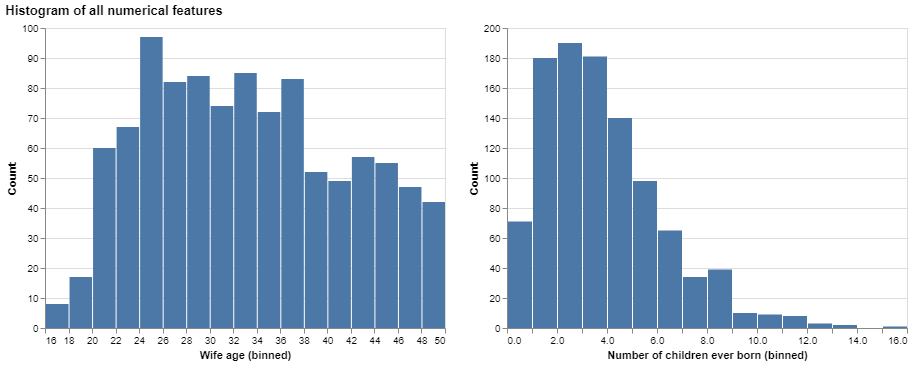

In [8]:
alt.Chart(train_df).mark_bar().encode(
    x=alt.X(alt.repeat(), type="quantitative", bin=alt.Bin(maxbins=30)),
    y=alt.Y("count()", title="Count"),
).repeat(numerical_features, title="Histogram of all numerical features")

Two graphs are skewed to the right. This is expected as there are more young wife than old wife and most people have around two to three kids.

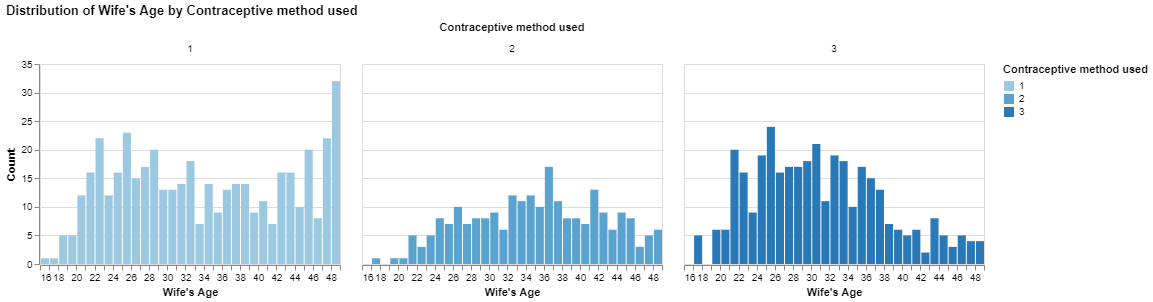

In [9]:
alt.Chart(train_df).mark_bar().encode(
    x=alt.X("Wife age:Q", bin=alt.Bin(maxbins=40), title="Wife's Age"),
    y=alt.Y("count()", title="Count"),
    color="Contraceptive method used:O",
).properties(width=300, height=200).facet(
    "Contraceptive method used",
    title="Distribution of Wife's Age by Contraceptive method used",
)

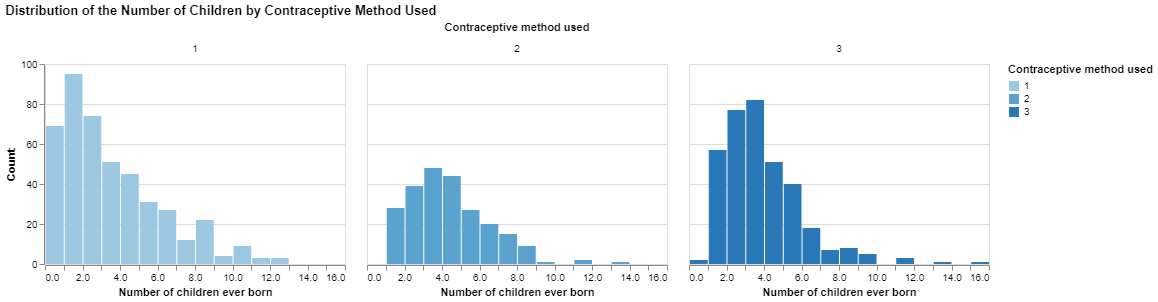

In [10]:
alt.Chart(
    train_df
).mark_bar().encode(
    x=alt.X(
        "Number of children ever born",
        title="Number of children ever born",
        bin=alt.Bin(maxbins=30),
    ),
    y=alt.Y("count()", title="Count"),
    color="Contraceptive method used:O",
).properties(
    width=300, height=200
).facet(
    "Contraceptive method used",
    title="Distribution of the Number of Children by Contraceptive Method Used"
)

### 3.3 Counting combinations of categorical features

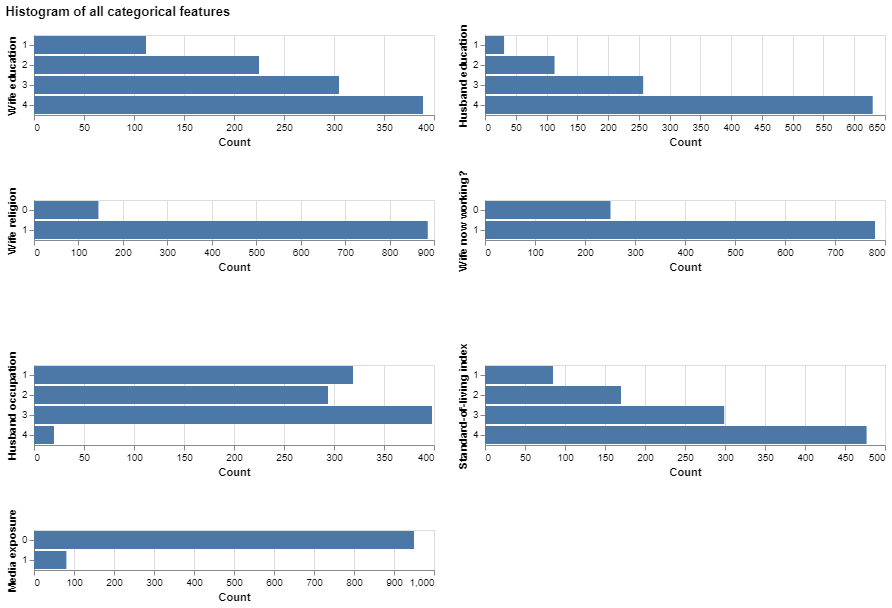

In [11]:
alt.Chart(train_df).mark_bar().encode(
    x=alt.X("count()", title="Count"),
    y=alt.Y(alt.repeat(), type="nominal"),
).repeat(categorical_features, columns=2, title="Histogram of all categorical features")

Overall, the survey captured women with high levels of education, religious belief, educated partners and living at a high standard of living.

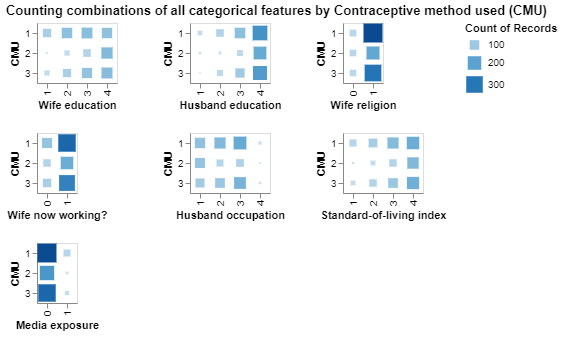

In [12]:
alt.Chart(train_df).mark_square().encode(
    x=alt.X(alt.repeat(), type="nominal"),
    y=alt.Y("Contraceptive method used:O", title="CMU"),
    color="count()",
    size="count()",
).repeat(
    categorical_features,
    columns=3,
    title="Counting combinations of all categorical features by Contraceptive method used (CMU)",
)

We spotted that most of the observation by target class 1 (no contraception) lies on certain categorical variables. But since there is class imbalance problem, we cananot imply they are correlated.